In [12]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('ggplot')

In [13]:
crime_full_df = pd.read_csv('../data/crimes_by_county.csv')
crime_full_df.head(5)

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
0,Albany,Albany City PD,2021,12.0,3837.0,945.0,24.0,60.0,179.0,682.0,2892.0,368.0,2170.0,354.0,Non-New York City
1,Albany,Albany County Sheriff,2021,12.0,73.0,18.0,0.0,0.0,1.0,17.0,55.0,9.0,41.0,5.0,Non-New York City
2,Albany,Albany County State Police,2021,12.0,125.0,43.0,0.0,27.0,1.0,15.0,82.0,7.0,66.0,9.0,Non-New York City
3,Albany,Altamont Vg PD,2021,12.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,Non-New York City
4,Albany,Bethlehem Town PD,2021,12.0,329.0,22.0,1.0,5.0,4.0,12.0,307.0,27.0,269.0,11.0,Non-New York City


In [14]:
crime_full_df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21823 entries, 0 to 21822
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               21823 non-null  object 
 1   Agency               21823 non-null  object 
 2   Year                 21823 non-null  int64  
 3   Months Reported      12309 non-null  float64
 4   Index Total          21439 non-null  float64
 5   Violent Total        21439 non-null  float64
 6   Murder               21439 non-null  float64
 7   Rape                 21439 non-null  float64
 8   Robbery              21439 non-null  float64
 9   Aggravated Assault   21439 non-null  float64
 10  Property Total       21439 non-null  float64
 11  Burglary             21439 non-null  float64
 12  Larceny              21439 non-null  float64
 13  Motor Vehicle Theft  21439 non-null  float64
 14  Region               21823 non-null  object 
dtypes: float64(11), int64(1), object(3)


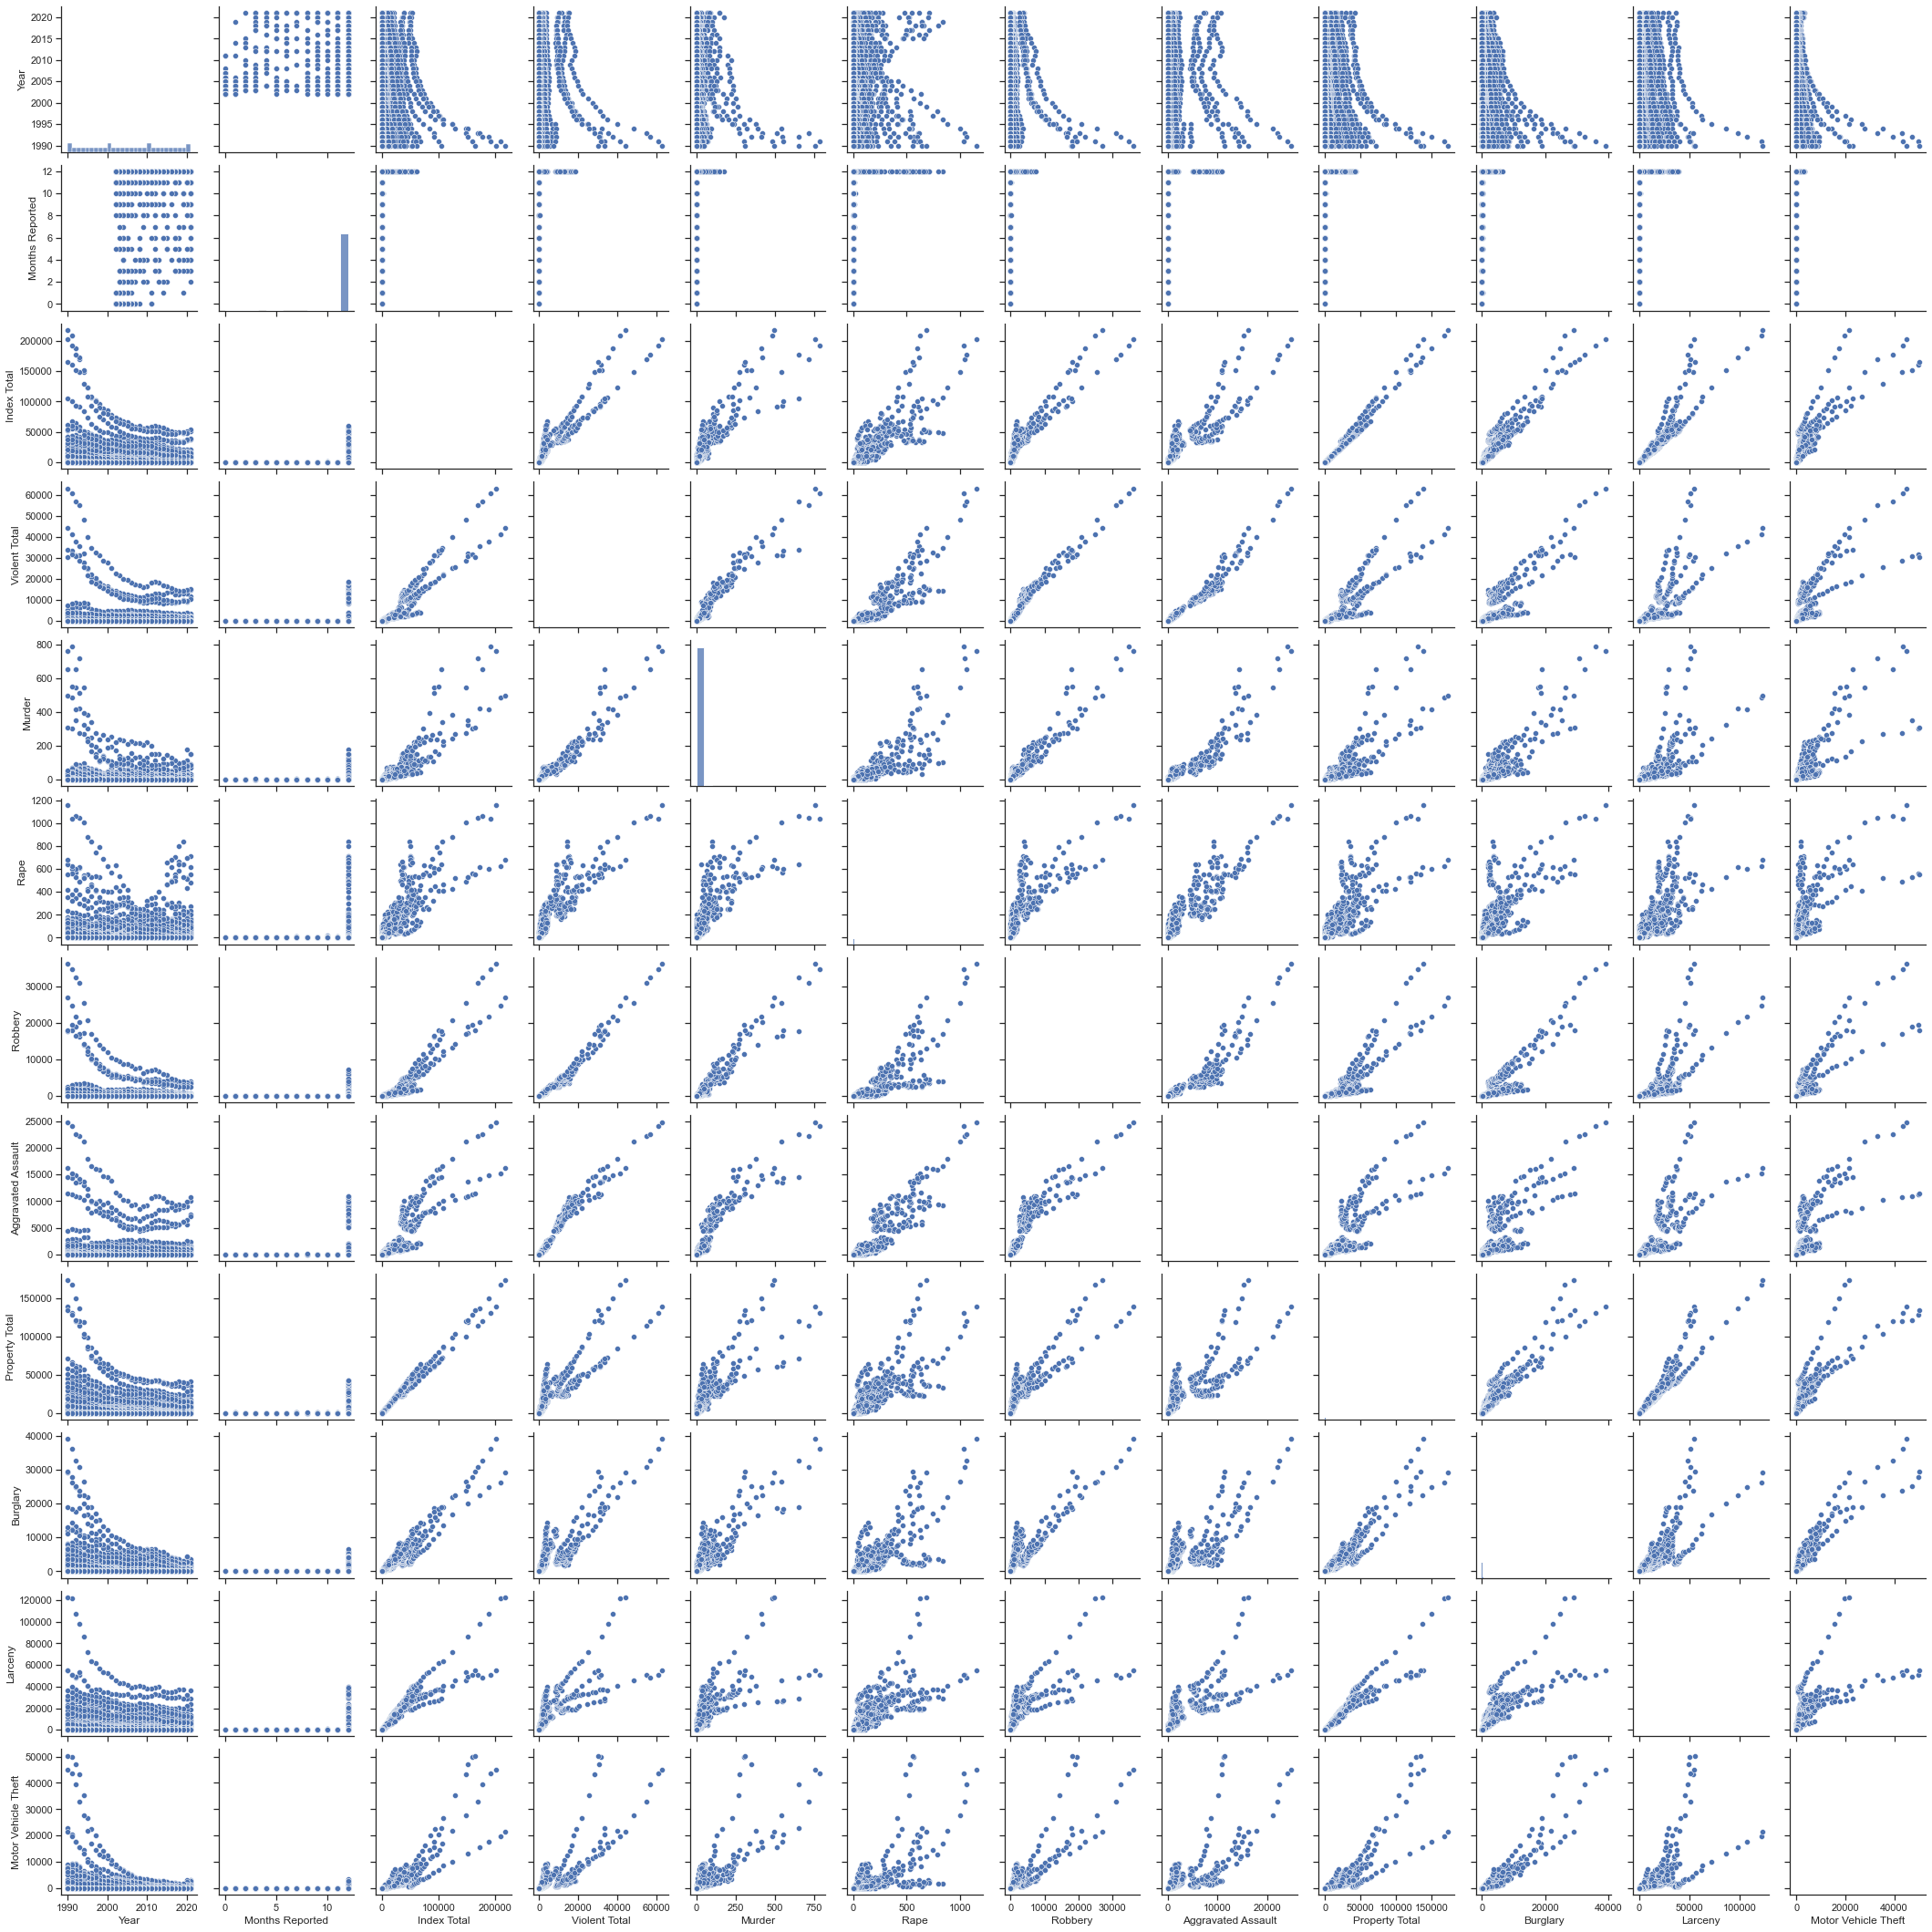

In [15]:
sns.set_theme(style='ticks')
sns.pairplot(crime_full_df)

In [17]:
crime16 = crime_full_df.loc[crime_full_df['Year'] == 2016]
crime16.head(5)

,County,Agency,Year,Months Reported,Index Total,Violent Total,Murder,Rape,Robbery,Aggravated Assault,Property Total,Burglary,Larceny,Motor Vehicle Theft,Region
3169,Albany,Albany City PD,2016,12.0,4317.0,849.0,2.0,58.0,248.0,541.0,3468.0,490.0,2863.0,115.0,Non-New York City
3170,Albany,Albany County Park PD,2016,12.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,Non-New York City
3171,Albany,Albany County Sheriff,2016,12.0,178.0,19.0,0.0,7.0,0.0,12.0,159.0,25.0,125.0,9.0,Non-New York City
3172,Albany,Albany County State Police,2016,12.0,137.0,15.0,2.0,9.0,2.0,2.0,122.0,9.0,110.0,3.0,Non-New York City
3173,Albany,Altamont Vg PD,2016,12.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,2.0,8.0,0.0,Non-New York City


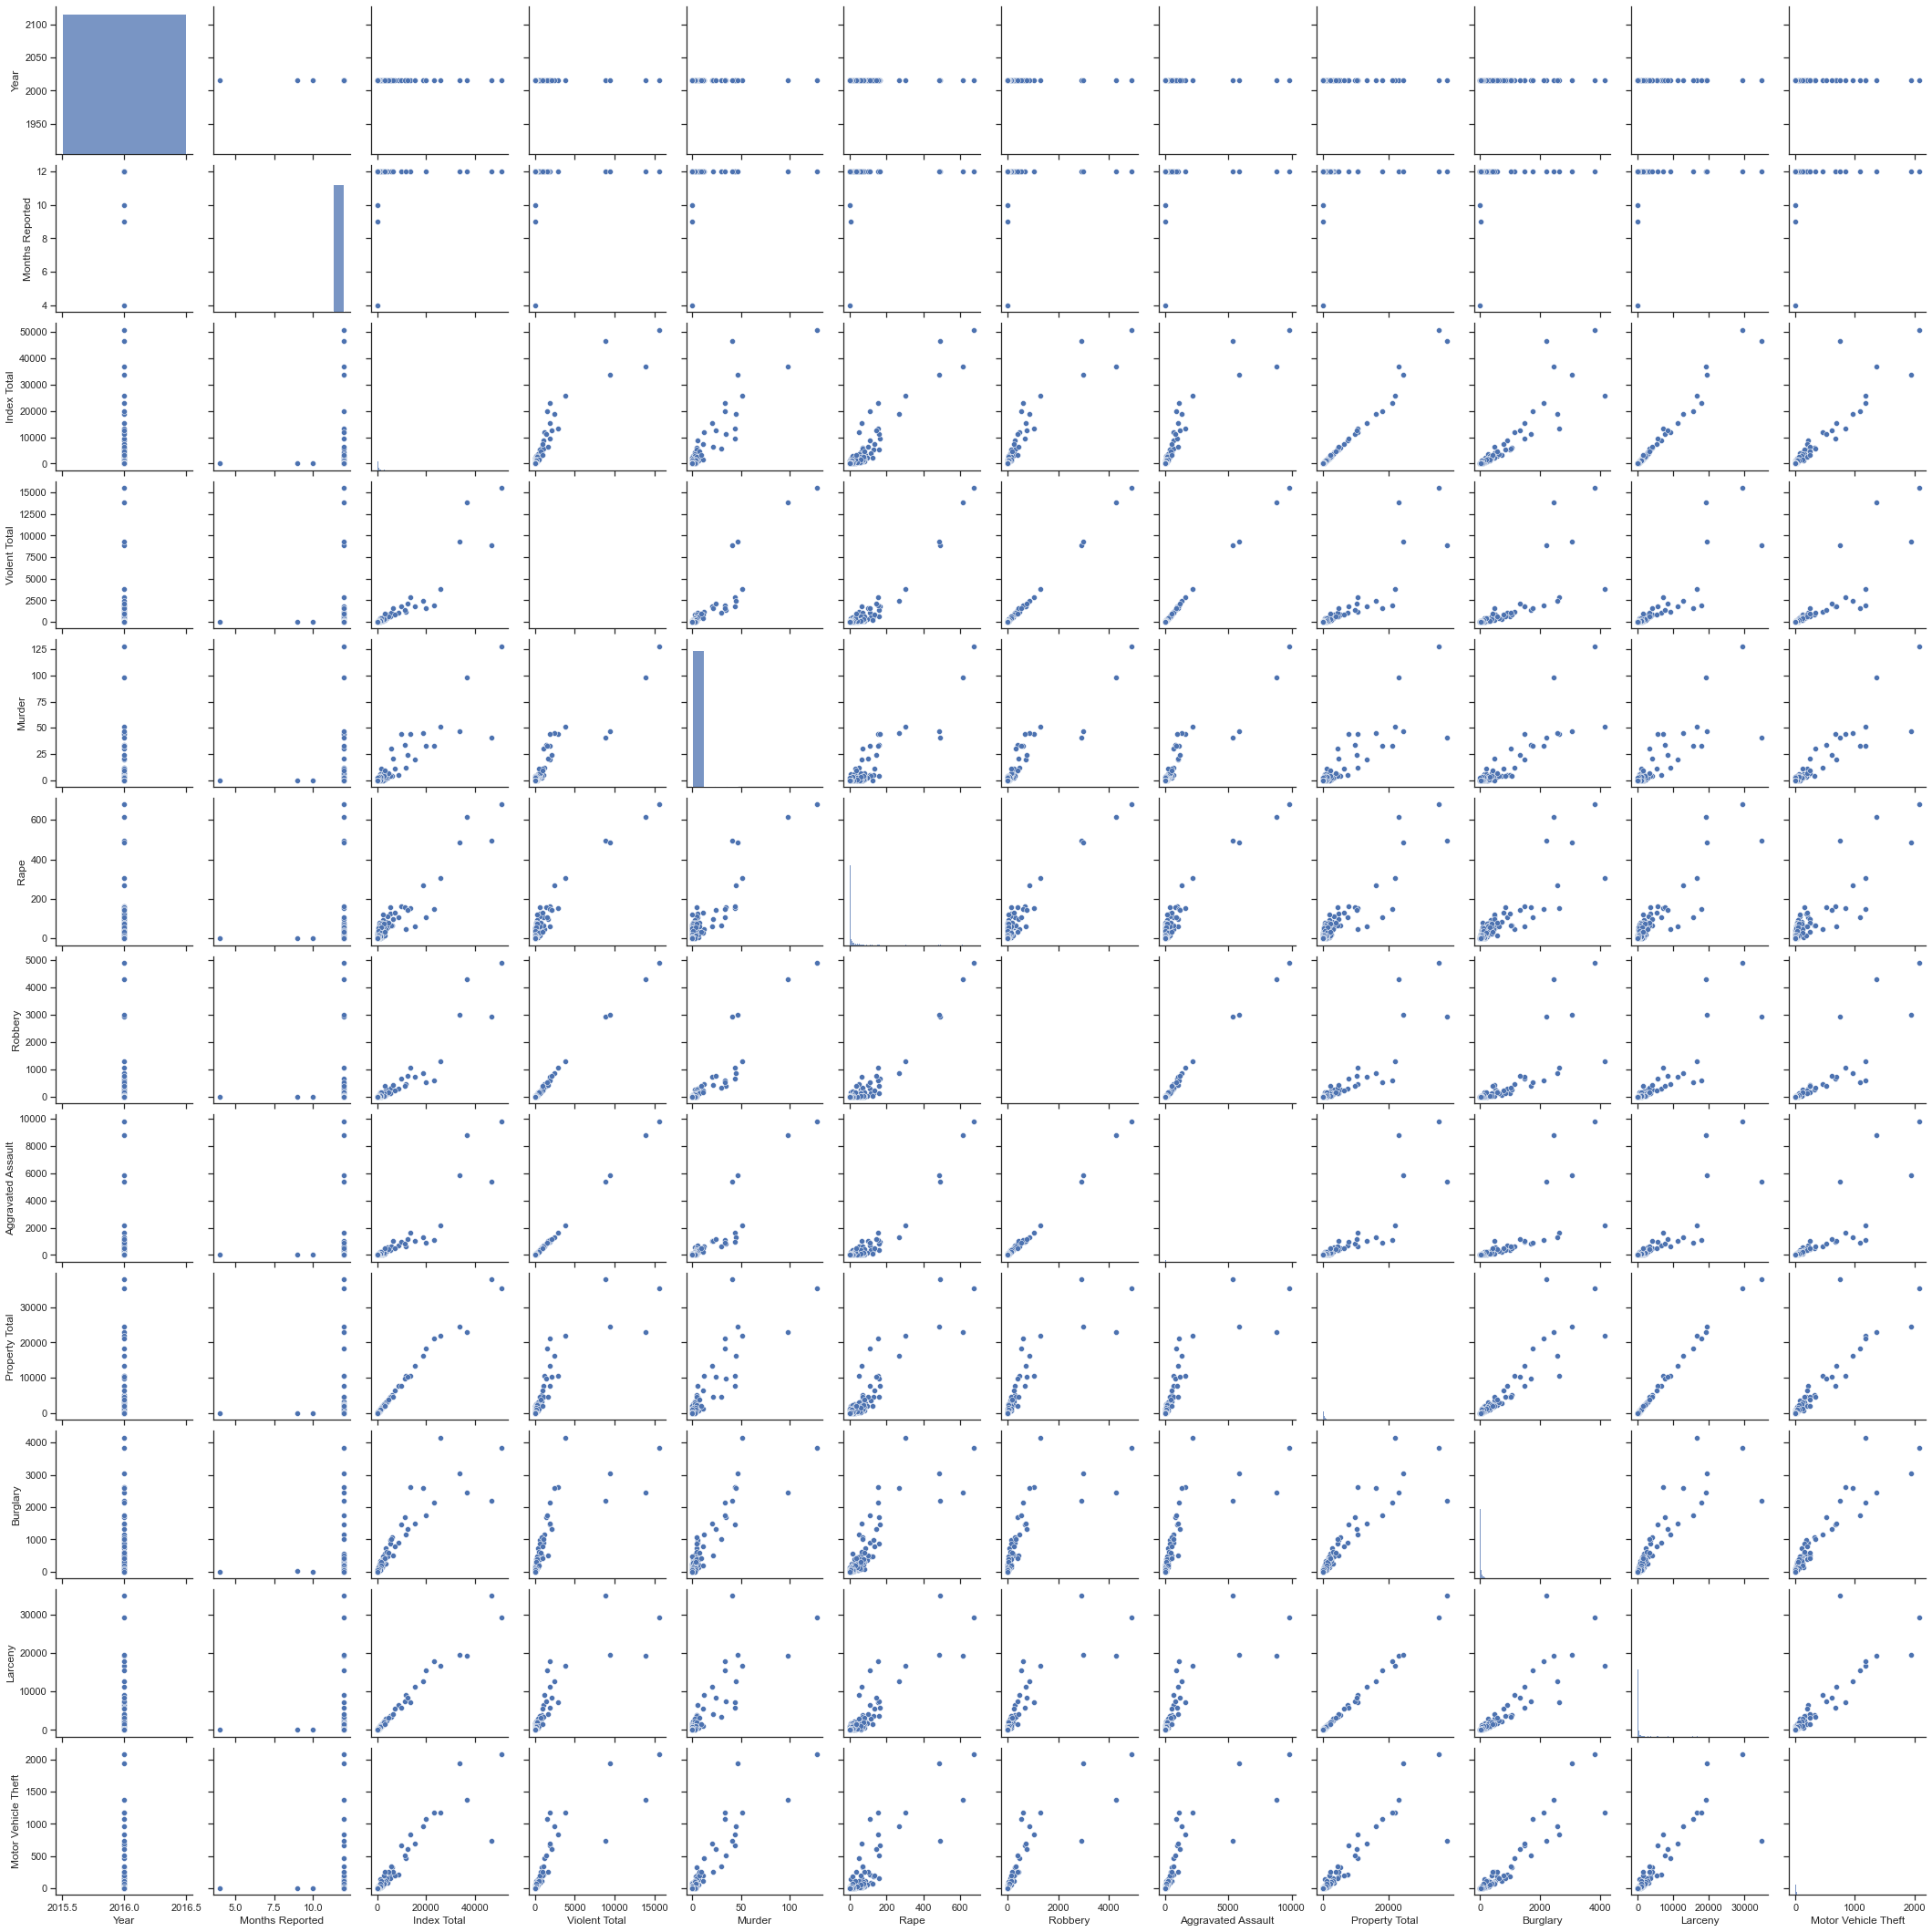

In [18]:
sns.set_theme(style='ticks')
sns.pairplot(crime16)

In [19]:
crime_activities_16 = crime16[['Year', 'Motor Vehicle Theft', 'Larceny', 'Burglary', 'Property Total', 'Aggravated Assault', 'Robbery', 'Rape', 'Murder', 'County', 'Agency']]
crime_activities_16.head(5)

,Year,Motor Vehicle Theft,Larceny,Burglary,Property Total,Aggravated Assault,Robbery,Rape,Murder,County,Agency
3169,2016,115.0,2863.0,490.0,3468.0,541.0,248.0,58.0,2.0,Albany,Albany City PD
3170,2016,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,Albany,Albany County Park PD
3171,2016,9.0,125.0,25.0,159.0,12.0,0.0,7.0,0.0,Albany,Albany County Sheriff
3172,2016,3.0,110.0,9.0,122.0,2.0,2.0,9.0,2.0,Albany,Albany County State Police
3173,2016,0.0,8.0,2.0,10.0,0.0,0.0,0.0,0.0,Albany,Altamont Vg PD


In [25]:
import plotly.express as px
import plotly.graph_objects as go
import json
import requests

ny_counties_json = pd.read_json('NY_counties.geojson')
# ny_counties = f''


In [26]:
# graph crime by county

crime_activities_16['text'] = "County: " + crime_activities_16['County']
fig = px.choropleth(locations=crime_activities_16['County'], geojson=ny_counties_json, color_continuous_scale="Viridis", range_color=(0, 12), scope="usa")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

C:\Users\Morgan\AppData\Local\Temp\ipykernel_45368\348384793.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: Object of type DataFrame is not JSON serializable